# Student: Aleksander Alan Prymek
# ID: 22263179

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold
from sklearn import cluster 
from sklearn import preprocessing

In [2]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points, labels, centers, title):
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        plt.scatter(points[labels==i, 0], points[labels==i, 1], c=colors[i%colors.size], label='cluster '+str(i))
    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)
    plt.title(title)
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')

In [3]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [4]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_data = min_max_scaler.fit_transform(data)
stan_scaler = preprocessing.StandardScaler()
stan_data = stan_scaler.fit_transform(data)

# K-Means Method

## Elbow Method

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
num_ks = 30
distances_norm = []
distances_stan = []
for k in range(1, num_ks+1):
  clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(norm_data)
  distances_norm.append(clustered_data_sklearn.inertia_)
  clustered_data_sklearn = cluster.KMeans(n_clusters=k, n_init=10, max_iter=300).fit(stan_data)
  distances_stan.append(clustered_data_sklearn.inertia_)

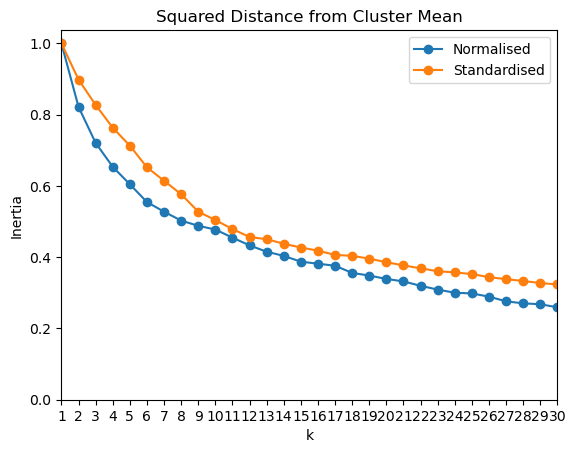

In [7]:
# since normalisation rescales the values to a smaller range it will produce smaller distance values
# we will rescale both sets to be able to plot them together
plt.plot(range(1,num_ks+1), np.array(distances_norm)/max(distances_norm), 'o-', label='Normalised')
plt.plot(range(1,num_ks+1), np.array(distances_stan)/max(distances_stan), 'o-', label='Standardised')
plt.xticks(list(range(1, num_ks+1)))
plt.xlim(1, num_ks)
plt.ylim(0)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Squared Distance from Cluster Mean')
plt.legend()
plt.show()

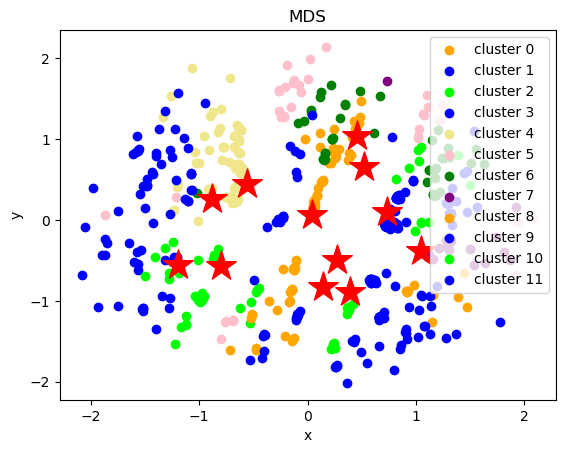

In [8]:
opt_elbow_k = 12
opt_elbow_data = cluster.KMeans(n_clusters=opt_elbow_k, n_init=10, max_iter=300).fit(norm_data)
data_and_centers = np.r_[norm_data, opt_elbow_data.cluster_centers_]
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-opt_elbow_k, :], labels=opt_elbow_data.labels_, centers=XYcoordinates[-opt_elbow_k:, :], title='MDS')

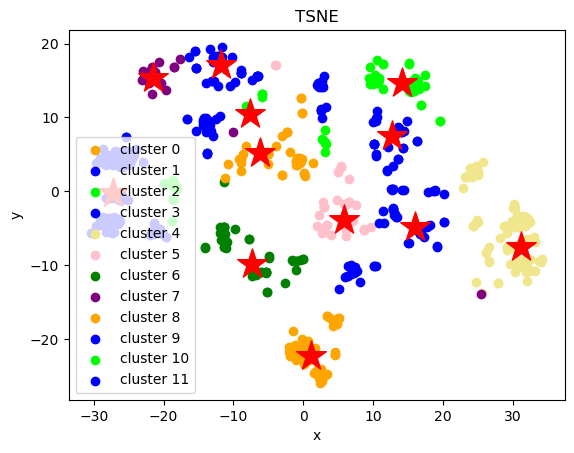

In [9]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-opt_elbow_k, :], labels=opt_elbow_data.labels_, centers=XYcoordinates[-opt_elbow_k:, :], title='TSNE')

## Silhouette Method

In [10]:
from sklearn.metrics import silhouette_score

In [11]:
sil_coeffs_norm = []
sil_coeffs_stan = []
for k in range(2, num_ks+1):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10).fit(norm_data)
    sil_coeffs_norm.append(silhouette_score(norm_data, kmeans.labels_, metric='euclidean'))
    kmeans = cluster.KMeans(n_clusters=k, n_init=10).fit(stan_data)
    sil_coeffs_stan.append(silhouette_score(stan_data, kmeans.labels_, metric='euclidean'))

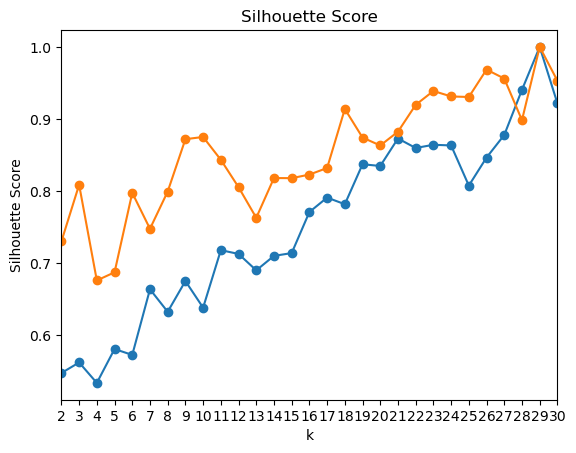

In [12]:
plt.plot(range(2, num_ks+1), np.array(sil_coeffs_norm)/max(sil_coeffs_norm), 'o-')
plt.plot(range(2, num_ks+1), np.array(sil_coeffs_stan)/max(sil_coeffs_stan), 'o-')
plt.xticks(list(range(2, num_ks+1)))
plt.xlim(2, num_ks)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

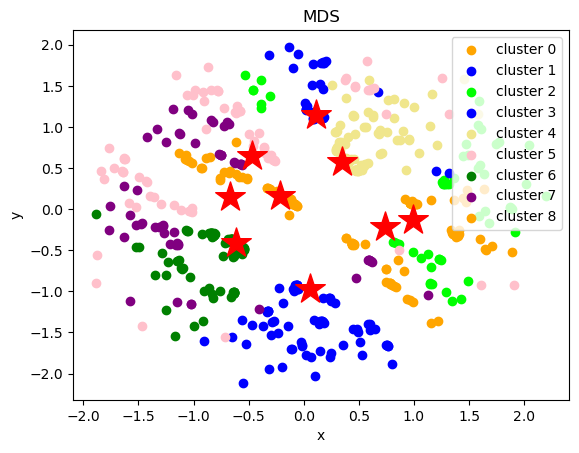

In [13]:
opt_sil_k = 9
opt_sil_data = cluster.KMeans(n_clusters=opt_sil_k, n_init=10, max_iter=300).fit(norm_data)
data_and_centers = np.r_[norm_data, opt_sil_data.cluster_centers_]
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-opt_sil_k, :], labels=opt_sil_data.labels_, centers=XYcoordinates[-opt_sil_k:, :], title='MDS')

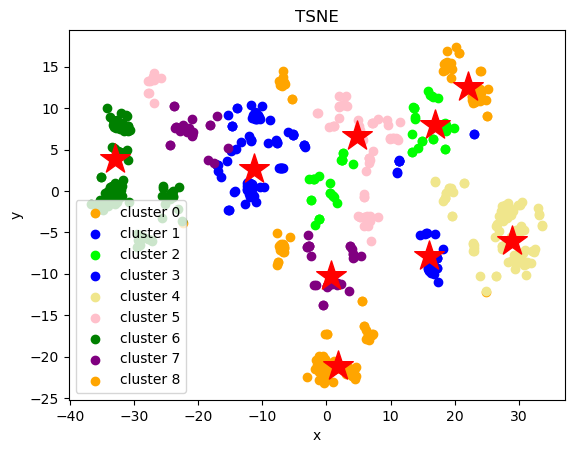

In [14]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
clustering_scatterplot(points=XYcoordinates[:-opt_sil_k, :], labels=opt_sil_data.labels_, centers=XYcoordinates[-opt_sil_k:, :], title='TSNE')

# Task 3

Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.

Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.

In [15]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
norm_data = min_max_scaler.fit_transform(data)
stan_scaler = preprocessing.StandardScaler()
stan_data = stan_scaler.fit_transform(data)

In [31]:
from itertools import combinations

def get_sum_squared_distances(points, labels):
    k = len(set(labels))
    total_sum = 0
    for i in range(k):
        cluster = points[np.where(labels == i)]
        pairs = combinations(cluster, r=2)
        cluster_sum = 0
        for pair in pairs:
            cluster_sum += np.linalg.norm(pair[0]-pair[1])**2
        total_sum += cluster_sum
    return total_sum

In [33]:
num_ks = 30
distances_norm = []
distances_stan = []
for k in range(2, num_ks+1):
  ac_data = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward').fit(norm_data)
  distances_norm.append(get_sum_squared_distances(norm_data, ac_data.labels_))
  ac_data = cluster.AgglomerativeClustering(n_clusters=k, linkage='ward').fit(stan_data)
  distances_stan.append(get_sum_squared_distances(stan_data, ac_data.labels_))

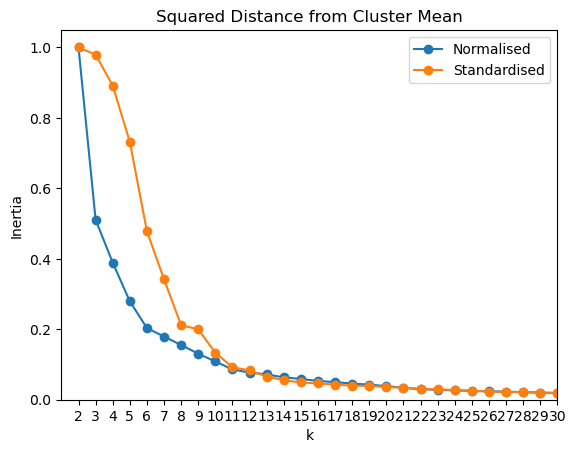

In [35]:
plt.plot(range(2, num_ks+1), np.array(distances_norm)/max(distances_norm), 'o-', label='Normalised')
plt.plot(range(2, num_ks+1), np.array(distances_stan)/max(distances_stan), 'o-', label='Standardised')
plt.xticks(list(range(2, num_ks+1)))
plt.xlim(1, num_ks)
plt.ylim(0)
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Squared Distance from Cluster Mean')
plt.legend()
plt.show()

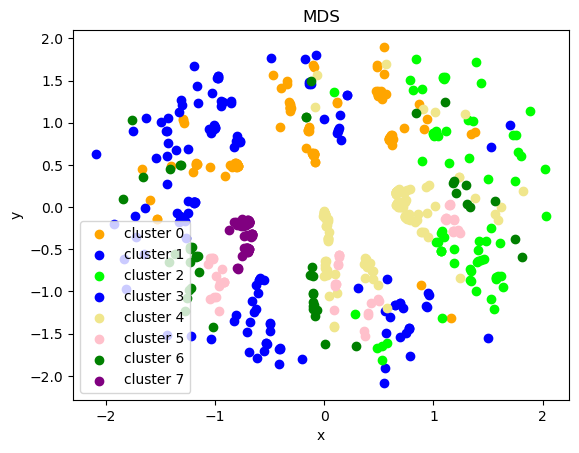

In [44]:
opt_elbow_k = 8
opt_elbow_data = cluster.AgglomerativeClustering(n_clusters=opt_elbow_k, linkage='ward').fit(norm_data)
XYcoordinates = manifold.MDS(n_components=2).fit_transform(norm_data)
clustering_scatterplot(points=XYcoordinates, labels=opt_elbow_data.labels_, centers=None, title='MDS')

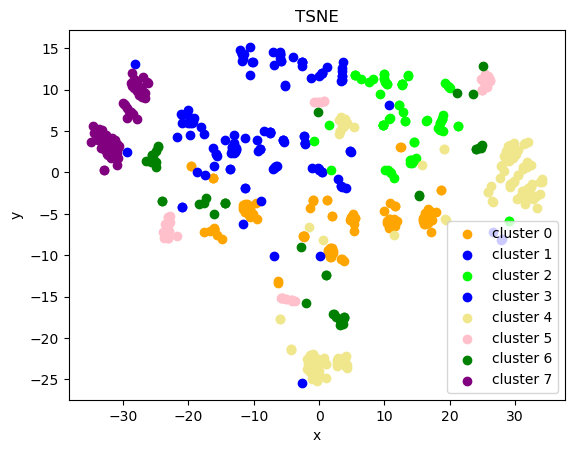

In [45]:
XYcoordinates = manifold.TSNE(n_components=2).fit_transform(norm_data)
clustering_scatterplot(points=XYcoordinates, labels=opt_elbow_data.labels_, centers=None, title='TSNE')